In [3]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load Dataset
df = pd.read_csv('ecommerce_furniture_dataset_2024.csv')

In [5]:
# view the first few  rows  of the dataset
print(df.head())


                                        productTitle originalPrice    price  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...           NaN   $46.79   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...           NaN  $169.72   
2  Desser For Bedroom With 7 Fabric Drawers Organ...         $78.4   $39.46   
3  Modern Accent Boucle Chair,Upholstered Tufted ...           NaN  $111.99   
4  Small Unit Simple Computer Desk Household Wood...        $48.82   $21.37   

   sold        tagText  
0   600  Free shipping  
1     0  Free shipping  
2     7  Free shipping  
3     0  Free shipping  
4     1  Free shipping  


In [6]:
# .Data Preprocessing:-->

# Check for missing values
print(df.isnull().sum())

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64


In [25]:
# Convert price columns to numeric

df['originalPrice'] = pd.to_numeric(df['originalPrice'].replace({r'\$': '', ',': ''}, regex=True), errors='coerce')
df['price'] = pd.to_numeric(df['price'].replace({r'\$': '', ',': ''}, regex=True), errors='coerce')
print(df.originalPrice)
print(df.price)

0         NaN
1         NaN
2       78.40
3         NaN
4       48.82
        ...  
1995      NaN
1996      NaN
1997      NaN
1998      NaN
1999      NaN
Name: originalPrice, Length: 2000, dtype: float64
0        46.79
1       169.72
2        39.46
3       111.99
4        21.37
         ...  
1995     72.49
1996    276.65
1997    196.44
1998    228.18
1999     99.48
Name: price, Length: 2000, dtype: float64


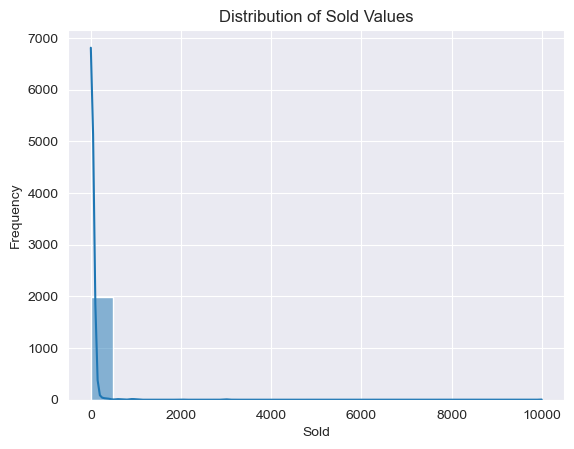

productTitle      object
originalPrice    float64
price            float64
sold               int64
tagText             int8
dtype: object


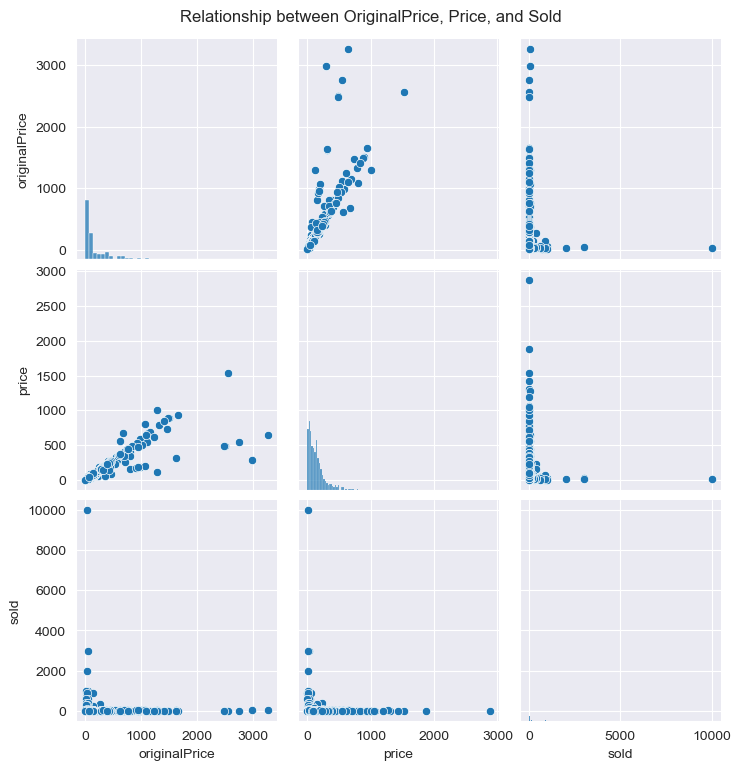

In [19]:
# Exploratory Data Analysis (EDA)

# Distribution of 'sold' values
sns.histplot(df['sold'], kde=True, bins=20)
plt.title('Distribution of Sold Values')
plt.xlabel('Sold')
plt.ylabel('Frequency')
plt.show()

# Check if the required columns exist and are numeric
required_columns = ['originalPrice', 'price', 'sold']

# Remove any non-numeric characters (e.g., dollar signs) and convert to numeric
df['originalPrice'] = pd.to_numeric(df['originalPrice'].replace({r'\$': '', ',': ''}, regex=True), errors='coerce')
df['price'] = pd.to_numeric(df['price'].replace({r'\$': '', ',': ''}, regex=True), errors='coerce')


# Verify the change and check data types again
print(df.dtypes)

# List numeric columns after cleaning
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Check if required columns are numeric
missing_columns = [col for col in required_columns if col not in numeric_columns]
if missing_columns:
    print(f"Error: The following columns are either missing or not numeric: {', '.join(missing_columns)}")
else:
    # Plot the relationship between 'originalPrice', 'price', and 'sold' if available
    selected_columns = ['originalPrice', 'price', 'sold']
    sns.pairplot(df[selected_columns], kind='scatter')
    plt.suptitle('Relationship between OriginalPrice, Price, and Sold', y=1.02)
    plt.show()

In [20]:
#  Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer


# Convert 'originalPrice' and 'price' columns to numeric type
df['originalPrice'] = pd.to_numeric(df['originalPrice'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Create a new feature: Percentage Discount
df['discount_percentage'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100

# Check if 'productTitle' exists
if 'productTitle' in df.columns:
    # Handle missing values
    df['productTitle'] = df['productTitle'].fillna('')  

    # Apply TF-IDF Vectorizer
    tfidf = TfidfVectorizer(max_features=1000)
    product_title_tfidf = tfidf.fit_transform(df['productTitle'])

    # Convert TF-IDF matrix to DataFrame
    productTitle_df = pd.DataFrame(product_title_tfidf.toarray(), columns=tfidf.get_feature_names_out())

    # Drop the original 'productTitle' column
    df = df.drop(columns=['productTitle'])

    # Concatenate TF-IDF features with the original DataFrame
    df = pd.concat([df, productTitle_df], axis=1)

    print("✅ TF-IDF Transformation Completed!")
else:
    print("❌ Error: 'productTitle' column is missing from the DataFrame.")



✅ TF-IDF Transformation Completed!


In [21]:
# Model Selection & Training.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Split the dataset into features (X) and target (y)
X = df.drop('sold', axis=1)
y = df['sold']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputation using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Calculate evaluation metrics
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Display results
print("Models trained successfully!")

print("\nLinear Regression Model Performance:")
print(f"Mean Squared Error: {lr_mse}")
print(f"R² Score: {lr_r2}")

print("\nRandom Forest Model Performance:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R² Score: {rf_r2}")

Models trained successfully!

Linear Regression Model Performance:
Mean Squared Error: 432077.53701037995
R² Score: -77.79566734067515

Random Forest Model Performance:
Mean Squared Error: 24281.91061748153
R² Score: -3.4281620485286153
